## Fixed-witdh binning

In [1]:
import numpy as np

In [3]:
small_counts = np.random.randint(0, 100, 20)
small_counts

array([ 4,  8, 86,  4, 75, 55, 29, 13, 76, 10, 95, 85, 66, 89, 38, 15, 52,
        0, 54, 79])

In [4]:
#Map to evenly spaced bins 0-9 by division
np.floor_divide(small_counts, 10)

array([0, 0, 8, 0, 7, 5, 2, 1, 7, 1, 9, 8, 6, 8, 3, 1, 5, 0, 5, 7])

In [5]:
large_counts = [296, 8286, 64011, 80, 3, 725, 867, 2215, 7689, 11495, 91897, 
                 44, 28, 7971, 926, 122, 22222]


In [6]:
np.floor(np.log10(large_counts))

array([2., 3., 4., 1., 0., 2., 2., 3., 3., 4., 4., 1., 1., 3., 2., 2., 4.])

Fixed-width binning is easy to compute. But if there are large gaps in the counts, then there will be many empty bins with no data.

## Quantile binning

In [8]:
import pandas as pd

In [9]:
pd.qcut(large_counts, 4, labels=False)

array([1, 2, 3, 0, 0, 1, 1, 2, 2, 3, 3, 0, 0, 2, 1, 0, 3])

In [10]:
large_counts_series = pd.Series(large_counts)
large_counts_series.quantile([0.25, 0.5, 0.75])

0.25     122.0
0.50     926.0
0.75    8286.0
dtype: float64

In [14]:
biz_df = pd.read_json("input/yelp/small_business.json.zip",lines=True, compression="zip")

In [15]:
biz_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 15 columns):
address         10000 non-null object
attributes      10000 non-null object
business_id     10000 non-null object
categories      10000 non-null object
city            10000 non-null object
hours           10000 non-null object
is_open         10000 non-null int64
latitude        10000 non-null float64
longitude       10000 non-null float64
name            10000 non-null object
neighborhood    10000 non-null object
postal_code     10000 non-null object
review_count    10000 non-null int64
stars           10000 non-null float64
state           10000 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 1.2+ MB


In [16]:
biz_df['review_count'].max()

3284

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

Text(0,0.5,'Occurrence')

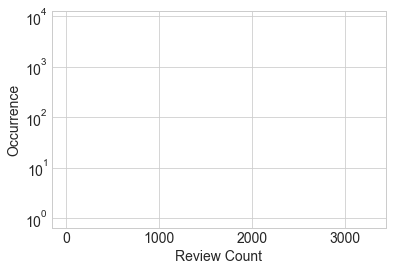

In [22]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
ax.set_yscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)

In [23]:
deciles = biz_df['review_count'].quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])
deciles

0.1     3.0
0.2     4.0
0.3     5.0
0.4     6.0
0.5     9.0
0.6    12.0
0.7    18.0
0.8    31.0
0.9    66.0
Name: review_count, dtype: float64

Text(0,0.5,'Occurrence')

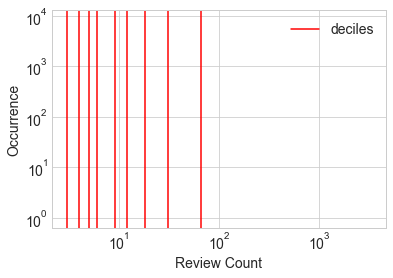

In [24]:

sns.set_style('whitegrid')
fig, ax = plt.subplots()
biz_df['review_count'].hist(ax=ax, bins=100)
for pos in deciles:
    handle = plt.axvline(pos, color='r')
ax.legend([handle], ['deciles'], fontsize=14)
ax.set_yscale('log')
ax.set_xscale('log')
ax.tick_params(labelsize=14)
ax.set_xlabel('Review Count', fontsize=14)
ax.set_ylabel('Occurrence', fontsize=14)